# SIT719 Security and Privacy Issues in Analytics
## CREDIT Task 5.1 C Analysing Cyber Security Attack Dataset
---
__Overview__
In this Credit Task, you will analyse a Cyber Security Attack Dataset.

Dataset Reference: https://github.com/incribo-inc/cybersecurity_attacks


Conduct the following analysis using Python scripting. Import any necessary libraries.
Step #1: Conduct the following analysis using Python scripting. Import any necessary libraries

In [1]:
import ipaddress

import pandas as pd
import numpy as np
from boltons.iterutils import unique
from pandas import Categorical
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


1.1 Display the first few rows of the dataset with the column headers to understand its structure.

In [3]:
df = pd.read_csv("data/cybersecurity_attacks.csv")
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


1.2 Handle Missing Values (Identify missing values in the dataset and then Apply appropriate methods to handle missing values – you can choose any logic or approach but needs to be meaningful)

In [6]:
print("Size of Data: " + str(df.shape[0]) + " Columns:" + str(df.shape[1]))
df.isnull().sum()

Size of Data: 40000 Columns:25


Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [7]:
# Malware Indicator has 20,000 null values - array(['IoC Detected', nan], dtype=object)
# Since it is a Categorical field, we can encode it as 1 if IOC Detected and 0 if not detected.
# df['Malware Indicators'].unique() # Finds the type of values in this column
df['Malware Indicators'] = df['Malware Indicators'].map({'IoC Detected': 1}).fillna(0)

# Alerts/Warnings has 20067 null entries - array([nan, 'Alert Triggered'], dtype=object)
# df['Alerts/Warnings'].unique() # Finds unique entries
df['Alerts/Warnings'] = df['Alerts/Warnings'].map({'Alert Triggered': 1}).fillna(0)

# Proxy Information
# df['Proxy Information'].unique()

# Firewall Logs - array(['Log Data', nan], dtype=object)
# df['Firewall Logs'].unique()
df['Firewall Logs'] = df['Firewall Logs'].map({'Log Data': 1}).fillna(0)

# IDS/IPS Alerts - array([nan, 'Alert Data'], dtype=object)
# df['IDS/IPS Alerts'].unique()
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].map({'Alert Data': 1}).fillna(0)

df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators            0
Anomaly Scores                0
Alerts/Warnings               0
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs                 0
IDS/IPS Alerts                0
Log Source                    0
dtype: int64

We also need to check if Proxy Information IP are valid or not: This step is not required since incorrect count is 0.

In [7]:
# import ipaddress
# def is_valid_ip(ip: str) -> bool:
#     try:
#         ipaddress.ip_address(ip)
#         return True
#     except ValueError:
#         return False
# invalid_ip_count = df['Proxy Information'].dropna().apply(lambda x: not is_valid_ip(x)).sum()
# invalid_ip_count

1.3 When most of the attacks happened (show by month and attack type). Give some insights based on data analysis supported by the visualization.

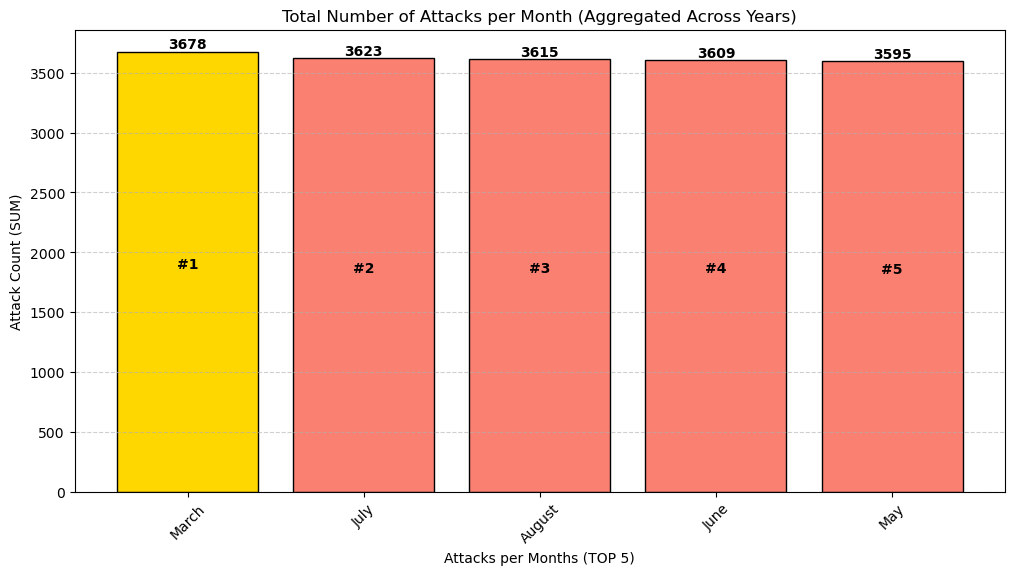

In [8]:
# Let's first tackle which month are the most attacks happening
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.strftime('%B')
df_grouped = df.groupby('Month').size().reset_index(name='count')

# Define month order to prevent alphabetical sorting
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
df_grouped['Month'] = pd.Categorical(df_grouped['Month'], categories=month_order, ordered=True)
df_grouped = df_grouped.sort_values('Month')

# Select only top5
df_top5 = df_grouped.nlargest(5, 'count')


# Plot
# Define colors: First bar in 'gold', others in 'salmon'
colors = ['gold'] + ['salmon'] * (len(df_top5) - 1)

plt.figure(figsize=(12, 6))
bars = plt.bar(df_top5['Month'], df_top5['count'], color=colors, edgecolor='black')

plt.xlabel('Attacks per Months (TOP 5)')
plt.ylabel('Attack Count (SUM)')
plt.title('Total Number of Attacks per Month (Aggregated Across Years)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, bar in enumerate(bars, start=1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'#{i}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()

Attack Type Based segregation

[Text(0, 0, '13428'), Text(0, 0, '13307'), Text(0, 0, '13265')]

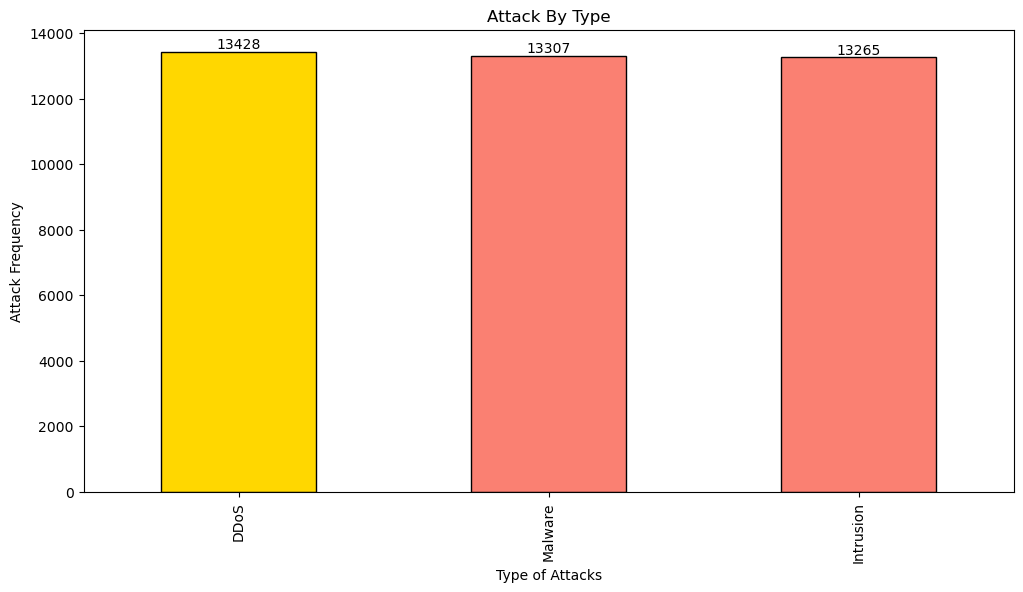

In [17]:
ax = (df['Attack Type'].value_counts()
      .plot(kind='bar',xlabel='Type of Attacks', ylabel='Attack Frequency', figsize=(12, 6), title='Attack By Type', color=['gold', 'salmon','salmon'], edgecolor='black'))
ax.bar_label(ax.containers[0])


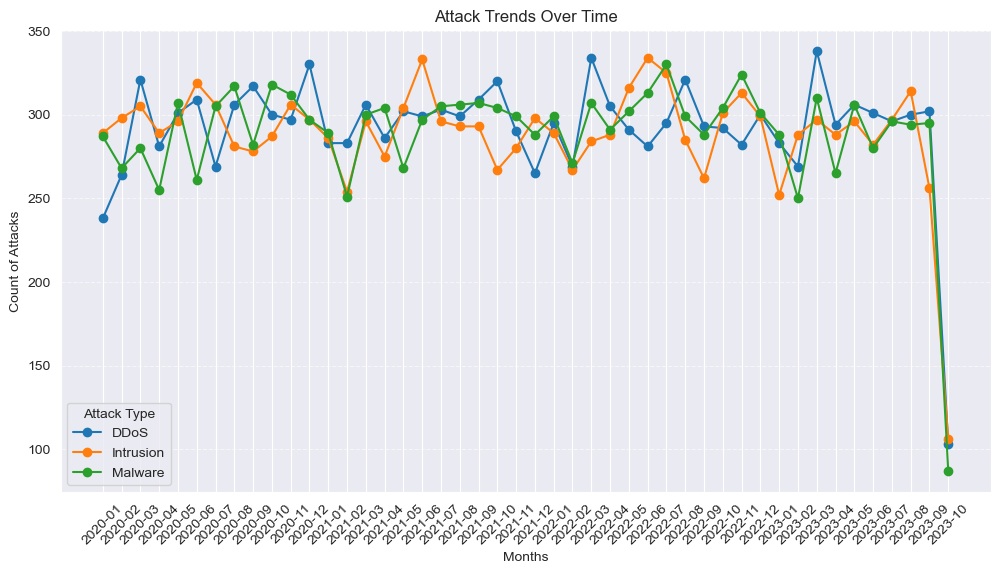

In [10]:

# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the year-month (e.g., "2024-01")
df['Month'] = df['Timestamp'].dt.strftime('%Y-%m')

# Group by 'Month' and 'Attack Type', then count occurrences
df_grouped = df.groupby(['Month', 'Attack Type']).size().reset_index(name='count')

# Pivot table to create separate columns for each attack type
df_pivot = df_grouped.pivot(index='Month', columns='Attack Type', values='count').fillna(0)

# Plot the line graph
plt.figure(figsize=(12, 6))

# Plot each attack type as a separate line
for attack_type in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[attack_type], marker='o', linestyle='-', label=attack_type)

plt.xlabel('Months')
plt.ylabel('Count of Attacks')
plt.title('Attack Trends Over Time')
plt.xticks(rotation=45)
plt.legend(title="Attack Type")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

Task 1.5 Show the packet length distribution for different attack types

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8c112d490>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8c112d7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8c0e131a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1f8c112deb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f8c112e4b0>,
 'means': []}

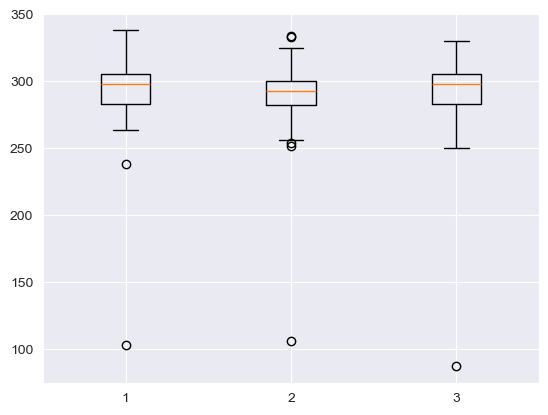

In [33]:
# df_pivot.sum()
plt.boxplot(df_pivot)


<Axes: ylabel='Frequency'>

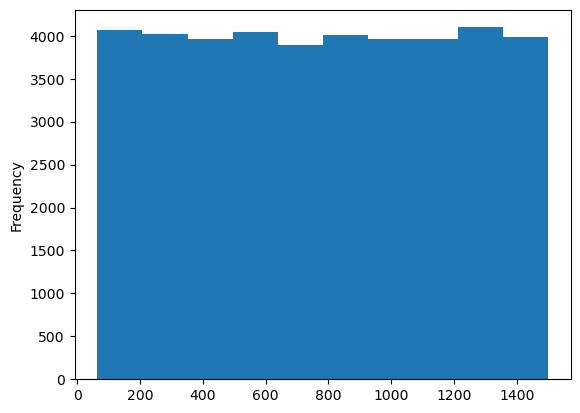

In [33]:
df['Packet Length'].plot(kind='hist', bins=10)
# bins = [0, 512, 1024, 1500]  # Upper limits for each category
# labels = ['<=512', '512-1024', '1024-1500']
#
# # Create a new categorical column
# df['Packet Length Category'] = pd.cut(df['Packet Length'], bins=bins, labels=labels)
# df_grouped_byAttackType = df.groupby(['Attack Type','Packet Length Category']).size().reset_index(name='attack_type_count').sort_values('attack_type_count',ascending=False)
# #df_grouped_byAttackType
#
# x_axis = df_grouped_byAttackType['Attack Type'] + ' - ' + df_grouped_byAttackType['Packet Length Category'].astype(str) + 'Byte/s'
# y_axis = df_grouped_byAttackType['attack_type_count']
#
# plt.figure(figsize=(30, 6))
# plt.title("Attack Type By Packet Length Category")
# plt.bar(x_axis, y_axis, edgecolor='black')
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.show()

Provide 5 unique insights that you can obtain based on the cyber data analysis. Provide supportive data and visualization (if any). List and explain them.

In [ ]:
# Insight No 1

In [ ]:
# Insight No 2

In [ ]:
# Insight No 3

In [ ]:
# Insight No 4

In [ ]:
# Insight No 5